In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import warnings
warnings.simplefilter('ignore')

In [59]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn 

In [60]:
ds = pd.read_csv("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv")

## Data engineering 

#### Missing data imputation

In [61]:
mean_impute_columns = ['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues']
mode_impute_columns = [
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

In [62]:
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [63]:
# Let's create a dict of mean values

mean_impute_values = dict()
for column in mean_impute_columns:
    mean_impute_values[column] = ds[column].mean()
print(mean_impute_values)

{'MonthlyRevenue': 58.834492346387385, 'MonthlyMinutes': 525.6534161246586, 'TotalRecurringCharge': 46.830087834784145, 'DirectorAssistedCalls': 0.895229018883496, 'OverageMinutes': 40.02778487355328, 'RoamingCalls': 1.2362441296103437, 'PercChangeMinutes': -11.547908445146014, 'PercChangeRevenues': -1.19198500394633}


In [64]:
for column in mean_impute_columns:
    ds[column] = impute_na(ds, column, mean_impute_values[column])

In [65]:
# Let's create a dict of mode values

mode_impute_values = dict()
for column in mode_impute_columns:
    mode_impute_values[column] = ds[column].mode()[0]
print(mode_impute_values)

{'ServiceArea': 'NYCBRO917', 'Handsets': 1.0, 'HandsetModels': 1.0, 'CurrentEquipmentDays': 202.0, 'AgeHH1': 0.0, 'AgeHH2': 0.0}


In [66]:
for column in mode_impute_columns:
    ds[column] = impute_na(ds, column, mode_impute_values[column])

##### Outlier Engineering

In [67]:
outlier_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                   'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
                   'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 
                   'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                   'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 
                   'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 
                   'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 
                   'MonthsInService', 'UniqueSubs', 'ActiveSubs']


In [68]:
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

##### Categorical encoding

In [69]:
cat_columns = ['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MaritalStatus',
 'ServiceArea', 'HandsetPrice','CreditRating', 'PrizmCode', 'Occupation',]

In [70]:
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes
    

In [71]:
display(ds.sample(15))

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
33312,3265390,0,66.32,669.0,60.0,1.73,36.0,0.0,-157.0,-14.4,26.0,5.0,47.3,1.7,0.0,63.4,61.3,2.7,165.3,220.0,31.0,0.0,1.3,11,1,1,296,1.0,1.0,346.0,26.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,0,15,0,2,0,3,0
16130,3126566,1,30.00,27.0,30.0,0.00,0.0,0.0,-25.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.3,0.0,3.0,0.0,0.0,0.0,0.0,21,1,1,92,1.0,1.0,629.0,50.0,50.0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,9,0,0,15,0,1,3,3,2
38145,3304094,0,17.27,248.0,10.0,0.00,24.0,0.0,14.0,-7.3,4.3,0.7,10.0,0.0,0.0,36.7,15.7,2.0,36.7,16.0,5.0,0.0,0.0,13,2,2,55,1.0,1.0,394.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,1,0,3,1
43656,3346234,1,43.19,470.0,38.0,0.25,30.0,0.0,105.0,41.8,12.0,5.3,39.3,0.7,0.0,143.2,58.3,3.7,87.7,41.0,17.3,0.0,1.0,12,1,1,128,2.0,2.0,306.0,34.0,34.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,4,2,3,2
8149,3064258,0,206.23,828.0,50.0,3.46,303.0,0.0,213.0,6.1,7.0,0.0,32.7,4.0,0.0,400.9,35.7,29.3,124.7,74.7,7.0,0.0,2.7,24,1,1,143,3.0,2.0,45.0,30.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,1,1,3,0
46286,3366126,0,45.27,1457.0,49.0,1.73,30.0,0.0,-487.0,-5.3,4.0,3.3,33.3,2.7,0.0,165.0,16.0,4.3,55.0,79.3,7.3,0.0,0.3,7,2,2,227,1.0,1.0,202.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,1,0,3,1
2562,3019986,0,62.24,947.0,48.0,0.25,2.0,0.7,98.0,-26.7,11.0,1.0,24.0,3.7,0.3,81.5,33.7,0.3,128.3,69.3,12.0,0.0,0.3,35,2,1,689,3.0,3.0,38.0,34.0,32.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,8,0,0,2,3,1
34418,3274630,0,76.23,320.0,85.0,1.24,0.0,0.0,30.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2,325,1.0,1.0,329.0,54.0,54.0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,9,0,0,15,0,1,2,4,2
9651,3076058,0,62.28,719.0,45.0,0.50,67.0,0.0,-290.0,-26.3,5.7,2.0,93.3,1.3,0.0,94.9,16.3,0.0,24.3,52.7,7.7,0.0,0.3,27,1,1,57,1.0,1.0,798.0,28.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,15,0,1,0,3,0
31724,3252738,0,36.78,97.0,28.0,0.00,23.0,0.0,-19.0,-6.4,2.3,3.0,5.7,3.3,0.0,17.6,6.0,1.0,31.0,14.0,5.3,0.0,0.0,10,2,1,537,3.0,1.0,32.0,58.0,56.0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,4,0,0,13,0,2,2,3,0


# Modelling and Validation

#### Define target and features columns

In [72]:
y_column = ['Churn'] # target variable
X_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']
X = ds[X_columns]
y = ds[y_column]

### Definition of Train-Valid-Test Split
Train-Valid-Test split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets. A brief description of the role of each of these datasets is below.
#### Train Dataset
Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model
#### Valid Dataset
Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.
#### Test Dataset
Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

In [73]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(37354, 56)
(37354, 1)
(4669, 56)
(4669, 1)
(4670, 56)
(4670, 1)


In [20]:
# just for example of validation set usage
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'eta':.5,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'binary:logistic',
}
params['eval_metric'] = "auc"
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtrain, "Train"),(dvalid, "Test")],
    early_stopping_rounds=50,
)

y_pred = model.predict(dtest)> 0.5
print(y_pred[:-10])
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


[0]	Train-auc:0.69997	Test-auc:0.62090
[1]	Train-auc:0.76184	Test-auc:0.63317
[2]	Train-auc:0.79689	Test-auc:0.63977
[3]	Train-auc:0.82361	Test-auc:0.63961
[4]	Train-auc:0.84860	Test-auc:0.63910
[5]	Train-auc:0.86259	Test-auc:0.63957
[6]	Train-auc:0.88150	Test-auc:0.63814
[7]	Train-auc:0.89200	Test-auc:0.63987
[8]	Train-auc:0.90110	Test-auc:0.64331
[9]	Train-auc:0.91064	Test-auc:0.64471
[10]	Train-auc:0.91884	Test-auc:0.64331
[11]	Train-auc:0.92816	Test-auc:0.64558
[12]	Train-auc:0.93023	Test-auc:0.64464
[13]	Train-auc:0.93293	Test-auc:0.64626
[14]	Train-auc:0.93890	Test-auc:0.64616
[15]	Train-auc:0.94212	Test-auc:0.64683
[16]	Train-auc:0.94656	Test-auc:0.64766
[17]	Train-auc:0.95080	Test-auc:0.64659
[18]	Train-auc:0.95888	Test-auc:0.64203
[19]	Train-auc:0.96288	Test-auc:0.64162
[20]	Train-auc:0.96565	Test-auc:0.64093
[21]	Train-auc:0.96919	Test-auc:0.64025
[22]	Train-auc:0.97339	Test-auc:0.63886
[23]	Train-auc:0.97489	Test-auc:0.63972
[24]	Train-auc:0.97624	Test-auc:0.63985
[25]	Train

#### example haw to use in your project

In [22]:
models = { 'RandomForestClassifier' : RandomForestClassifier(), 'LogisticRegression' : LogisticRegression() }

In [23]:
classifiers = dict()
for name, model in models.items():
    print('training ',name)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('test set metrics: ', metrics.classification_report(y_test, y_pred))
    y_pred = classifier.predict(X_valid)
    print('validation set metrics: ', metrics.classification_report(y_valid, y_pred))
    classifiers[name] = classifier


training  RandomForestClassifier
test set metrics:                precision    recall  f1-score   support

           0       0.73      0.97      0.83      3367
           1       0.51      0.07      0.13      1303

    accuracy                           0.72      4670
   macro avg       0.62      0.52      0.48      4670
weighted avg       0.67      0.72      0.64      4670

validation set metrics:                precision    recall  f1-score   support

           0       0.72      0.98      0.83      3274
           1       0.66      0.09      0.16      1395

    accuracy                           0.72      4669
   macro avg       0.69      0.54      0.50      4669
weighted avg       0.70      0.72      0.63      4669

training  LogisticRegression
test set metrics:                precision    recall  f1-score   support

           0       0.72      0.99      0.84      3367
           1       0.29      0.01      0.02      1303

    accuracy                           0.72      4670
   

# K-fold validation

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:



![title](image/k_fold.jpg)

In [ ]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = RandomForestClassifier()
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)    
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


k-fold set metrics:                precision    recall  f1-score   support

           0       0.73      0.97      0.83      5379
           1       0.53      0.08      0.14      2092

    accuracy                           0.72      7471
   macro avg       0.63      0.53      0.49      7471
weighted avg       0.68      0.72      0.64      7471

k-fold set metrics:                precision    recall  f1-score   support

           0       0.71      0.98      0.83      5248
           1       0.60      0.08      0.14      2223

    accuracy                           0.71      7471
   macro avg       0.66      0.53      0.48      7471
weighted avg       0.68      0.71      0.62      7471

k-fold set metrics:                precision    recall  f1-score   support

           0       0.73      0.97      0.83      5356
           1       0.57      0.09      0.16      2115

    accuracy                           0.72      7471
   macro avg       0.65      0.53      0.50      7471
weighted av

# Random permutations cross-validation

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.



![title]("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/image/random.png")

In [24]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    classifier = RandomForestClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

k-fold set metrics:                precision    recall  f1-score   support

           0       0.72      0.98      0.83      6625
           1       0.65      0.09      0.15      2714

    accuracy                           0.72      9339
   macro avg       0.69      0.53      0.49      9339
weighted avg       0.70      0.72      0.64      9339

k-fold set metrics:                precision    recall  f1-score   support

           0       0.73      0.98      0.83      6656
           1       0.59      0.08      0.14      2683

    accuracy                           0.72      9339
   macro avg       0.66      0.53      0.49      9339
weighted avg       0.69      0.72      0.63      9339

k-fold set metrics:                precision    recall  f1-score   support

           0       0.72      0.97      0.83      6593
           1       0.57      0.08      0.14      2746

    accuracy                           0.71      9339
   macro avg       0.64      0.53      0.48      9339
weighted av

# Leave-One-Out cross-validator

Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

Note: LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.

Due to the high number of test sets (which is the same as the number of samples) this cross-validation method can be very costly. For large datasets one should favor KFold, ShuffleSplit or StratifiedKFold.

In [74]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

print(X.shape, y.shape)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

(46693, 56) (46693, 1)
Accuracy: 0.693 (0.461)


# Group k-fold

GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

Imagine you have three subjects, each with an associated number from 1 to 3:

![title](GroupKFold.png)

In [26]:
X['CreditRating'].unique()

array([0, 2, 3, 5, 1, 4, 6], dtype=int8)

In [27]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=7)
for train_index, test_index in gkf.split(X, y, groups=X['CreditRating']):
    print('Uniq CreditRating for test ',X.iloc[test_index]['CreditRating'].unique())
    classifier = RandomForestClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

Uniq CreditRating for test  [1]
k-fold set metrics:                precision    recall  f1-score   support

           0       0.71      0.98      0.82     12645
           1       0.59      0.07      0.13      5374

    accuracy                           0.71     18019
   macro avg       0.65      0.52      0.48     18019
weighted avg       0.68      0.71      0.62     18019

Uniq CreditRating for test  [0]
k-fold set metrics:                precision    recall  f1-score   support

           0       0.70      0.97      0.82      5527
           1       0.59      0.09      0.16      2478

    accuracy                           0.70      8005
   macro avg       0.65      0.53      0.49      8005
weighted avg       0.67      0.70      0.61      8005

Uniq CreditRating for test  [2]
k-fold set metrics:                precision    recall  f1-score   support

           0       0.70      0.97      0.82      5263
           1       0.59      0.09      0.16      2379

    accuracy           

# Validation metrics

## Classification metrics

#### Define target and features columns

In [28]:
y_column = ['Churn'] # target variable
X_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']
X = ds[X_columns]
y = ds[y_column]

#### Train test set split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Confusion matrix

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).

By definition, entry  in a confusion matrix is the number of observations actually in group , but predicted to be in group . Here is an example:

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[7186 2741]
 [2570 1511]]


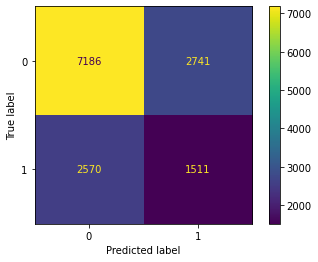

In [31]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

### Accuracy 

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

![title](image/accuracy.gif)

It works well only if there are equal number of samples belonging to each class.
For example, consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
The real problem arises, when the cost of misclassification of the minor class samples are very high. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.6197886921758995

### Precision
It is the number of correct positive results divided by the number of positive results predicted by the classifier.

![title](image/precission.gif)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [35]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.precision_score(y_test, y_pred)


0.35597572362278246

### Recall
It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

![title](image/recall.gif)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [37]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.recall_score(y_test, y_pred)


0.37172261700563586

### F1 Score
F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :

![title](image/f1.gif)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [39]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.f1_score(y_test, y_pred)


0.3604985618408437

### Area Under Curve(AUC)
Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. Before defining AUC, let us understand two basic terms.

The function roc_curve computes the receiver operating characteristic curve, or ROC curve. Quoting Wikipedia :

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

This function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions. Here is a small example of how to use the roc_curve function:

In [40]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


In [41]:
roc_auc

0.5466504478033927

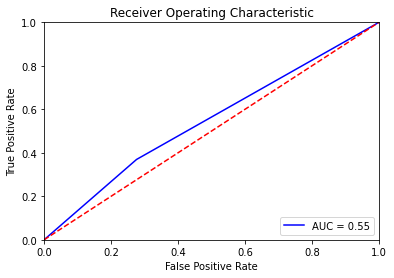

In [42]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### The classification_report function builds a text report showing the main classification metrics. 

In [43]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      9927
           1       0.36      0.38      0.37      4081

    accuracy                           0.62     14008
   macro avg       0.55      0.55      0.55     14008
weighted avg       0.63      0.62      0.62     14008



## Regression metrics

In [44]:
# Let's predict  RoamingCalls 

y_column = 'RoamingCalls'

X_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'Churn', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']
X = ds[X_columns]
y = ds[y_column]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Mean Absolute Error

Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output. However, they don’t gives us any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data. 

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.1462480831208088


### Mean Squared Error

Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values. The advantage of MSE being that it is easier to compute the gradient, whereas Mean Absolute Error requires complicated linear programming tools to compute the gradient. As, we take square of the error, the effect of larger errors become more pronounced then smaller error, hence the model can now focus more on the larger errors.

In [50]:
from sklearn.metrics import mean_squared_error
print(metrics.mean_squared_error(y_test, y_pred))

6.92386570724528


### Root mean squared error

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various data points into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.[1]

RMSD is always non-negative, and a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSD is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.

RMSD is the square root of the average of squared errors. The effect of each error on RMSD is proportional to the size of the squared error; thus larger errors have a disproportionately large effect on RMSD. Consequently, RMSD is sensitive to outliers.

In [51]:
from sklearn.metrics import r2_score
print(metrics.r2_score(y_test, y_pred))

0.18363349203449886


### Mean absolute percentage error

The mean_absolute_percentage_error (MAPE), also known as mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable.

In [52]:
from sklearn.metrics import mean_absolute_percentage_error
print(metrics.mean_absolute_percentage_error(y_test, y_pred), '%')

2342333838074611.5 %
